In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dish=pd.read_csv("Sample Dataset.csv")

In [5]:
dish=dish.dropna()

In [6]:
dish['GROSSADDS']=dish['GROSSADDS'].apply(lambda x : x*1000+100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


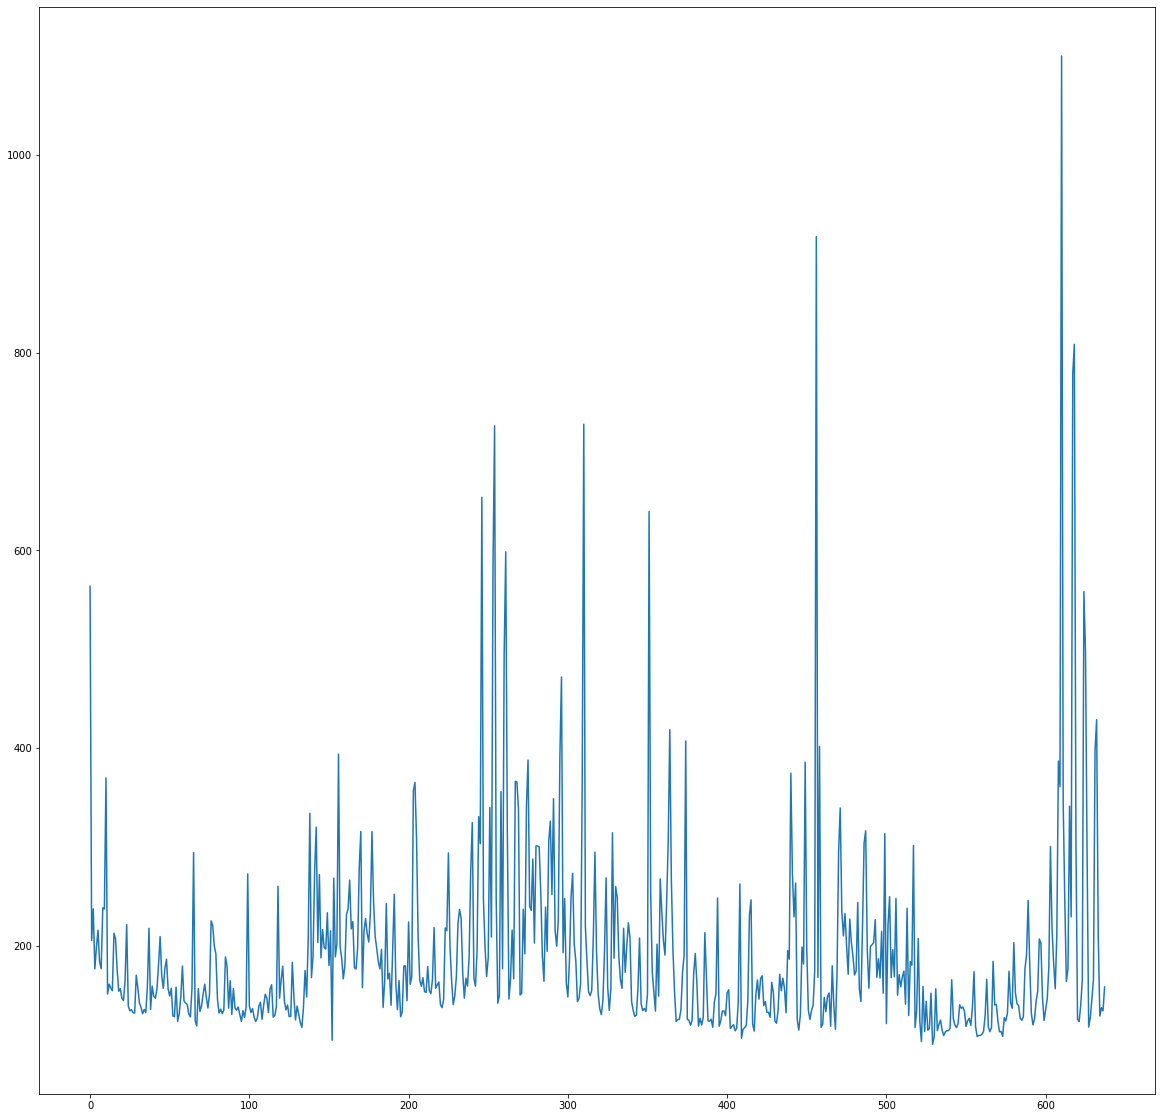

In [7]:
plt.figure(figsize=(20,20))
plt.plot(dish["GROSSADDS"])

In [8]:
dates=dish["DT"]
prices=dish["GROSSADDS"]

In [9]:
prices=prices.to_numpy()

In [10]:
len(prices)

638

In [11]:
def wh(price):
  i=0
  windows=[]
  Horizon=[]
  while(i<len(price)-30):
    n=list(price[i:i+31])
    windows.append(list(n[:-1]))
    Horizon.append(n[-1])
    i+=1
  return windows,Horizon

In [12]:
windows,horizon=wh(prices)

In [13]:
len(windows),len(horizon)

(608, 608)

In [14]:
len(windows[-1])

30

In [15]:
def tt_split(data,labels):
  x_train=data[:len(data)+1-int((len(data)*20)/100)]
  x_test=data[len(data)-1-int((len(data)*20)/100):]
  y_train=labels[:len(labels)+1-int((len(labels)*20)/100)]
  y_test=labels[len(labels)-1-int((len(labels)*20)/100):]
  train_dates=dates[:len(data)+1-int((len(data)*20)/100)]
  test_dates=dates[len(data)-1-int((len(data)*20)/100):]

  return x_train,x_test,y_train,y_test,train_dates,test_dates

In [16]:
train_windows,test_windows,train_labels,test_labels,train_dates,test_dates=tt_split(windows,horizon)

In [17]:
val_windows=test_windows[61:]
test_windows=test_windows[0:61]

val_labels=test_labels[61:]
test_labels=test_labels[0:61]

val_dates=test_dates[61:]
val_dates=val_dates[0:61]
test_dates=test_dates[0:61]

In [18]:
len(train_windows),len(test_windows),len(train_labels),len(test_labels),len(val_windows),len(val_labels),len(val_dates),len(test_dates)

(488, 61, 488, 61, 61, 61, 61, 61)

#Dense Model 1

In [19]:
dense_model=tf.keras.Sequential([tf.keras.layers.Dense(10,activation="relu"),
                          tf.keras.layers.Dense(1)])

In [20]:
dense_model.compile(optimizer="adam",loss="mape",metrics="mae")

In [21]:
dense_model.fit(train_windows,train_labels,batch_size=128,epochs=100,validation_data=(test_windows,test_labels))

Epoch 1/100
4/4 [==============================] - 1s 80ms/step - loss: 95.5332 - mae: 160.8941 - val_loss: 87.4311 - val_mae: 107.8111
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 67.5374 - mae: 116.7099 - val_loss: 50.0968 - val_mae: 62.1122
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 47.2971 - mae: 87.5908 - val_loss: 33.2302 - val_mae: 42.2808
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 43.5668 - mae: 86.0396 - val_loss: 38.3233 - val_mae: 49.5245
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 46.3662 - mae: 93.1043 - val_loss: 39.7476 - val_mae: 51.6178
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 45.5302 - mae: 91.6198 - val_loss: 36.2091 - val_mae: 46.8947
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 42.0730 - mae: 84.5954 - val_loss: 31.4523 - val_mae: 40.5121
Epoch 8/100
4/4 [==============================] - 0s 18ms/

In [22]:
dense_model.evaluate(test_windows,test_labels)

2/2 [==============================] - 0s 7ms/step - loss: 15.8754 - mae: 21.8715


[15.87542724609375, 21.871530532836914]

In [23]:
dense_preds=dense_model.predict(test_windows)

2/2 [==============================] - 0s 5ms/step


In [24]:
len(val_dates),len(val_windows)

(61, 61)

2/2 [==============================] - 0s 6ms/step


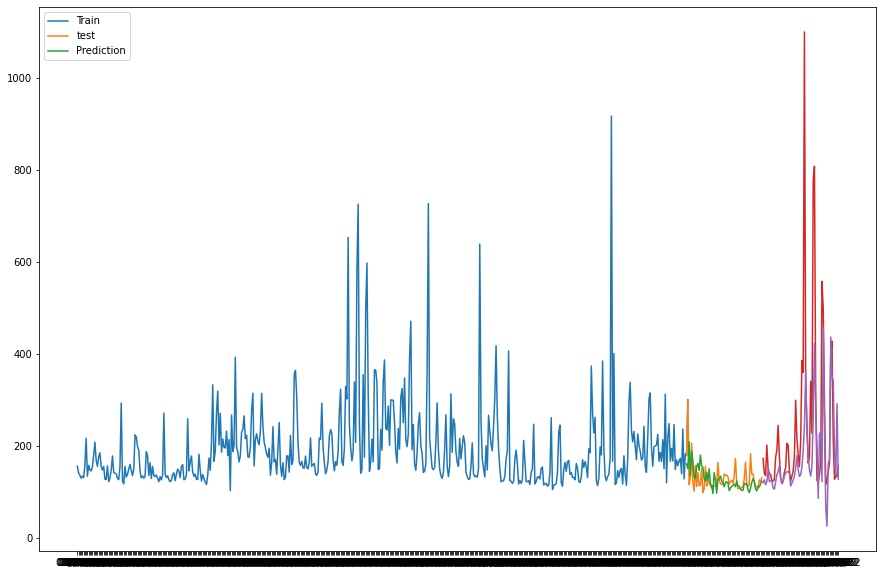

In [25]:
plt.figure(figsize=(15,10))
plt.plot(train_dates,train_labels,label="Train")
plt.plot(test_dates,test_labels,label="test")
plt.plot(test_dates,dense_preds,label="Prediction")
plt.plot(val_dates,val_labels)
plt.plot(val_dates,dense_model.predict(val_windows))
plt.legend()

#Conv1D

In [26]:
model_conv=tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    tf.keras.layers.Conv1D(filters=128,kernel_size=10,padding="causal",activation="relu",strides=1),
    tf.keras.layers.Dense(1)
                            ])

In [27]:
model_conv.compile(loss=tf.keras.losses.mape,optimizer="adam",metrics=["mae"])

In [28]:
model_conv.fit(train_windows,train_labels,epochs=50,batch_size=128,validation_data=(test_windows,test_labels))

Epoch 1/50
4/4 [==============================] - 1s 67ms/step - loss: 68.1620 - mae: 138.3281 - val_loss: 18.0700 - val_mae: 26.1677
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 35.1092 - mae: 68.7400 - val_loss: 34.1181 - val_mae: 42.5743
Epoch 3/50
4/4 [==============================] - 0s 25ms/step - loss: 38.0271 - mae: 70.6343 - val_loss: 19.7141 - val_mae: 26.6544
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 28.5129 - mae: 62.5589 - val_loss: 21.3829 - val_mae: 30.8902
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 30.5758 - mae: 71.1078 - val_loss: 24.7149 - val_mae: 35.3796
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 29.7812 - mae: 69.4795 - val_loss: 19.0180 - val_mae: 27.5494
Epoch 7/50
4/4 [==============================] - 0s 15ms/step - loss: 27.9394 - mae: 62.7782 - val_loss: 17.6246 - val_mae: 24.8164
Epoch 8/50
4/4 [==============================] - 0s 15ms/step - los

In [29]:
model_conv.evaluate(test_windows,test_labels)

2/2 [==============================] - 0s 7ms/step - loss: 16.6466 - mae: 23.4778


[16.646574020385742, 23.477815628051758]

In [30]:
conv_preds=model_conv.predict(test_windows)

2/2 [==============================] - 0s 5ms/step


2/2 [==============================] - 0s 8ms/step


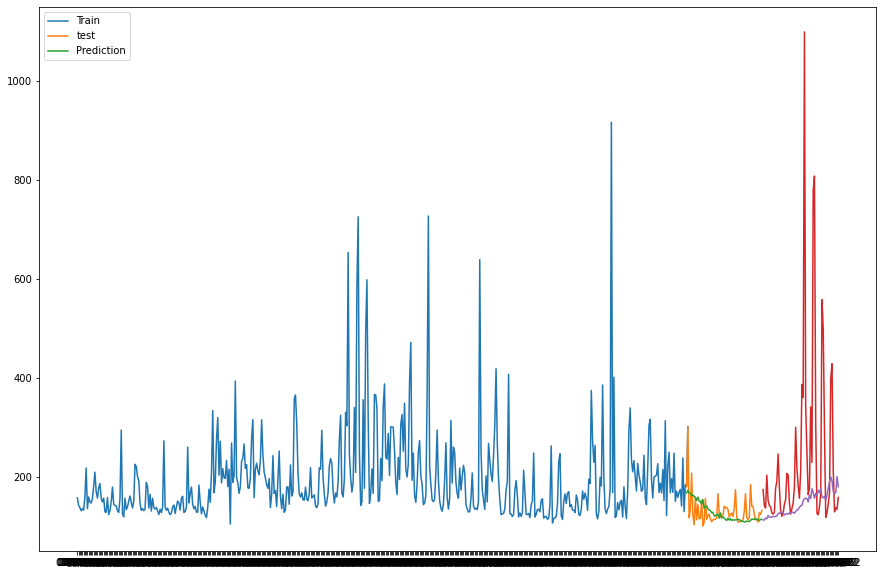

In [31]:
plt.figure(figsize=(15,10))
plt.plot(train_dates,train_labels,label="Train")
plt.plot(test_dates,test_labels,label="test")
plt.plot(test_dates,tf.squeeze(conv_preds,axis=1),label="Prediction")
plt.plot(val_dates,val_labels)
plt.plot(val_dates,tf.squeeze(model_conv.predict(val_windows)))
plt.legend()

#LSTM

In [32]:
lstm_model=tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    tf.keras.layers.LSTM(1024,activation="relu",return_sequences=True),
    tf.keras.layers.LSTM(512,activation="relu",return_sequences=True),
    tf.keras.layers.LSTM(256,activation="relu",return_sequences=True),
    tf.keras.layers.LSTM(128,activation="relu",return_sequences=True),
    tf.keras.layers.LSTM(64,activation="relu"),
    tf.keras.layers.Dense(1),
                            ])

In [33]:
lstm_model.compile(loss=tf.keras.losses.mape,optimizer="adam",metrics=["mae"])

In [34]:
lstm_model.fit(train_windows,train_labels,epochs=25,batch_size=128,validation_data=(test_windows,test_labels))

Epoch 1/25
4/4 [==============================] - 9s 470ms/step - loss: 99.3972 - mae: 192.7494 - val_loss: 93.0317 - val_mae: 121.8855
Epoch 2/25
4/4 [==============================] - 1s 224ms/step - loss: 72.5515 - mae: 145.7742 - val_loss: 16.3266 - val_mae: 22.0007
Epoch 3/25
4/4 [==============================] - 1s 226ms/step - loss: 33.8955 - mae: 63.5666 - val_loss: 16.0384 - val_mae: 22.2018
Epoch 4/25
4/4 [==============================] - 1s 225ms/step - loss: 25.5318 - mae: 60.4154 - val_loss: 20.6588 - val_mae: 29.2365
Epoch 5/25
4/4 [==============================] - 1s 223ms/step - loss: 22.7887 - mae: 51.6270 - val_loss: 20.8623 - val_mae: 26.6393
Epoch 6/25
4/4 [==============================] - 1s 229ms/step - loss: 21.6216 - mae: 48.8246 - val_loss: 18.2941 - val_mae: 25.8829
Epoch 7/25
4/4 [==============================] - 1s 219ms/step - loss: 21.2360 - mae: 50.5230 - val_loss: 17.7429 - val_mae: 23.3122
Epoch 8/25
4/4 [==============================] - 1s 221ms/

In [35]:
lstm_model.evaluate(test_windows,test_labels)

2/2 [==============================] - 0s 26ms/step - loss: 13.8196 - mae: 20.0192


[13.819635391235352, 20.019176483154297]

In [36]:
lstm_preds=lstm_model.predict(test_windows)

2/2 [==============================] - 1s 26ms/step


2/2 [==============================] - 0s 23ms/step


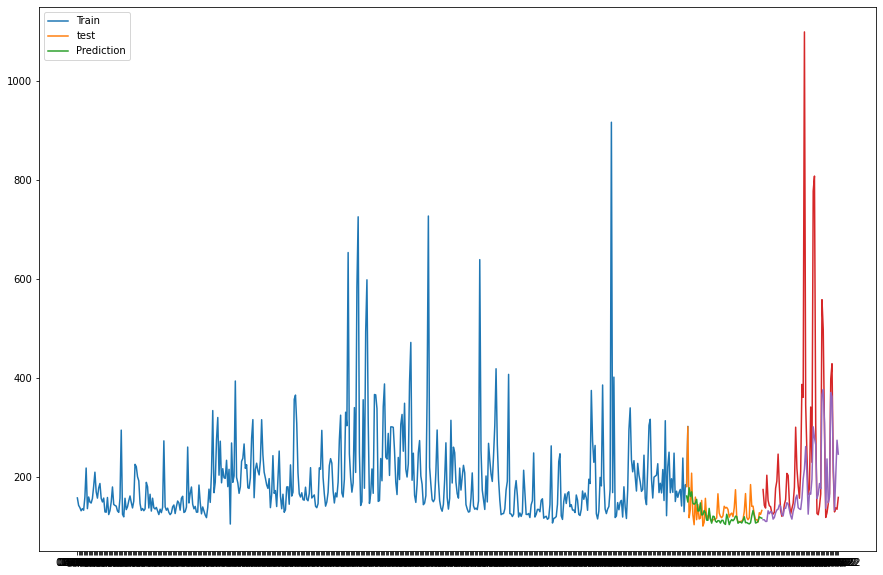

In [37]:
plt.figure(figsize=(15,10))
plt.plot(train_dates,train_labels,label="Train")
plt.plot(test_dates,test_labels,label="test")
plt.plot(test_dates,lstm_preds,label="Prediction")
plt.plot(val_dates,val_labels)
plt.plot(val_dates,lstm_model.predict(val_windows))
plt.legend()

#Bi_LSTM

In [38]:
Bi_LSTM_model=tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1024,activation="relu",return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512,activation="relu",return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,activation="relu",return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,activation="relu",return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation="relu")),
    tf.keras.layers.Dense(1),
                            ])

In [39]:
Bi_LSTM_model.compile(loss=tf.keras.losses.mape,optimizer="adam",metrics=["mae"])

In [40]:
Bi_LSTM_model.fit(train_windows,train_labels,epochs=25,batch_size=128,validation_data=(test_windows,test_labels))

Epoch 1/25
4/4 [==============================] - 19s 1s/step - loss: 94.7303 - mae: 184.5389 - val_loss: 43.7247 - val_mae: 59.3408
Epoch 2/25
4/4 [==============================] - 2s 552ms/step - loss: 32.5078 - mae: 65.7275 - val_loss: 22.8190 - val_mae: 32.2966
Epoch 3/25
4/4 [==============================] - 2s 565ms/step - loss: 23.6958 - mae: 53.8556 - val_loss: 17.5755 - val_mae: 22.9803
Epoch 4/25
4/4 [==============================] - 2s 561ms/step - loss: 19.9757 - mae: 48.0083 - val_loss: 15.5989 - val_mae: 20.9734
Epoch 5/25
4/4 [==============================] - 2s 545ms/step - loss: 19.3920 - mae: 45.4168 - val_loss: 14.5062 - val_mae: 20.1127
Epoch 6/25
4/4 [==============================] - 2s 552ms/step - loss: 18.1510 - mae: 42.8176 - val_loss: 14.4319 - val_mae: 20.4745
Epoch 7/25
4/4 [==============================] - 2s 546ms/step - loss: 18.2348 - mae: 42.8243 - val_loss: 13.8940 - val_mae: 19.6675
Epoch 8/25
4/4 [==============================] - 2s 557ms/step

In [41]:
Bi_LSTM_model.evaluate(test_windows,test_labels)

2/2 [==============================] - 0s 47ms/step - loss: 12.0090 - mae: 17.4737


[12.008993148803711, 17.47372817993164]

In [42]:
Bi_LSTM_preds=Bi_LSTM_model.predict(test_windows)

2/2 [==============================] - 2s 45ms/step


2/2 [==============================] - 0s 57ms/step


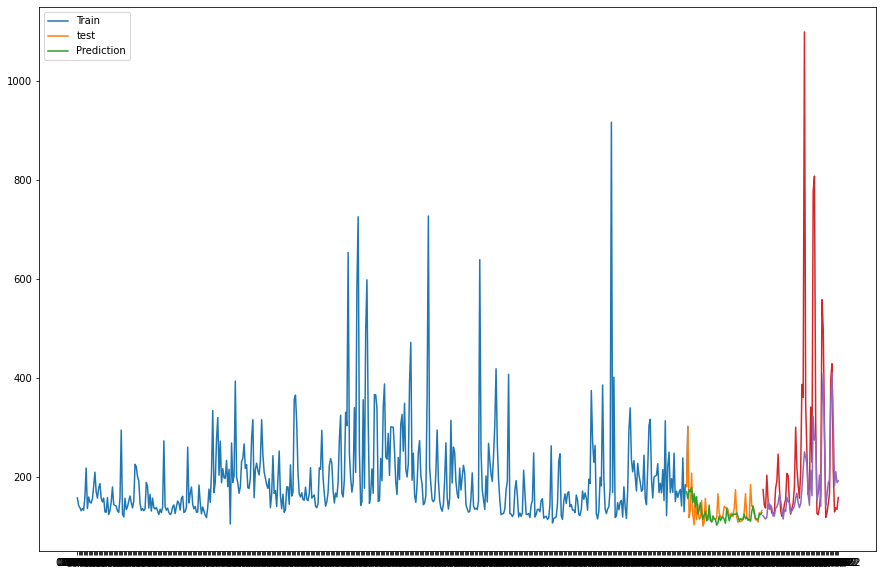

In [43]:
plt.figure(figsize=(15,10))
plt.plot(train_dates,train_labels,label="Train")
plt.plot(test_dates,test_labels,label="test")
plt.plot(test_dates,Bi_LSTM_preds,label="Prediction")
plt.plot(val_dates,val_labels)
plt.plot(val_dates,Bi_LSTM_model.predict(val_windows))
plt.legend()

#NBeats

In [44]:
class NbeatsBlock(tf.keras.layers.Layer):
  def __init__(self,input_size,theta_size,horizon,n_neurons,n_layers,**kwargs):
    super().__init__(**kwargs)
    self.input_size=input_size
    self.theta_size=theta_size
    self.horizon=horizon
    self.n_neurons=n_neurons
    self.n_layers=n_layers

    self.hidden_layers=[tf.keras.layers.Dense(n_neurons,activation="relu") for i in range(n_layers)]

    self.theta_layer = tf.keras.layers.Dense(theta_size,activation="linear")

  def call(self,inputs):
    x=inputs
    for layer in self.hidden_layers:
      x=layer (x)
    theta=self.theta_layer(x)

    backcast,forecast = theta[:,:self.input_size], theta[:,-self.horizon]

    return backcast,forecast 

In [45]:
n=NbeatsBlock(30,31,1,512,4)

In [46]:
x=tf.keras.layers.Input(shape=(30,))
residuals,forecast=n(x)

for i in range(30-1):     
  backcast,block_forecast=NbeatsBlock(30,31,1,512,4)(residuals)

  residuals = tf.keras.layers.subtract([residuals,backcast])
  forecast = tf.keras.layers.add([forecast,block_forecast])

In [47]:
nbeats=tf.keras.Model(inputs=x,outputs=forecast)

In [48]:
nbeats.compile(loss="mape",optimizer="adam",metrics=["mae"])

In [49]:
nbeats.fit(train_windows,train_labels,epochs=100,batch_size=128,validation_data=(test_windows,test_labels))

Epoch 1/100
4/4 [==============================] - 13s 1s/step - loss: 618.1608 - mae: 1033.5826 - val_loss: 74.7321 - val_mae: 98.6502
Epoch 2/100
4/4 [==============================] - 2s 466ms/step - loss: 71.8709 - mae: 133.7024 - val_loss: 38.4971 - val_mae: 52.6184
Epoch 3/100
4/4 [==============================] - 2s 456ms/step - loss: 31.6957 - mae: 68.7026 - val_loss: 19.9837 - val_mae: 28.3234
Epoch 4/100
4/4 [==============================] - 2s 465ms/step - loss: 24.1459 - mae: 55.5543 - val_loss: 16.7266 - val_mae: 22.7071
Epoch 5/100
4/4 [==============================] - 2s 448ms/step - loss: 20.5399 - mae: 47.5957 - val_loss: 16.8821 - val_mae: 22.4589
Epoch 6/100
4/4 [==============================] - 2s 457ms/step - loss: 19.1101 - mae: 44.9247 - val_loss: 14.1255 - val_mae: 19.6139
Epoch 7/100
4/4 [==============================] - 2s 460ms/step - loss: 17.1385 - mae: 41.9083 - val_loss: 13.5695 - val_mae: 18.7734
Epoch 8/100
4/4 [==============================] - 2s

In [50]:
nbeats.evaluate(test_windows,test_labels)

2/2 [==============================] - 0s 68ms/step - loss: 14.8960 - mae: 19.6439


[14.896015167236328, 19.64388084411621]

In [51]:
nbeats.evaluate(val_windows,val_labels)

2/2 [==============================] - 0s 69ms/step - loss: 30.7340 - mae: 81.4673


[30.733989715576172, 81.46731567382812]

In [52]:
nbeats_preds=nbeats.predict(test_windows)

2/2 [==============================] - 1s 61ms/step


2/2 [==============================] - 0s 61ms/step


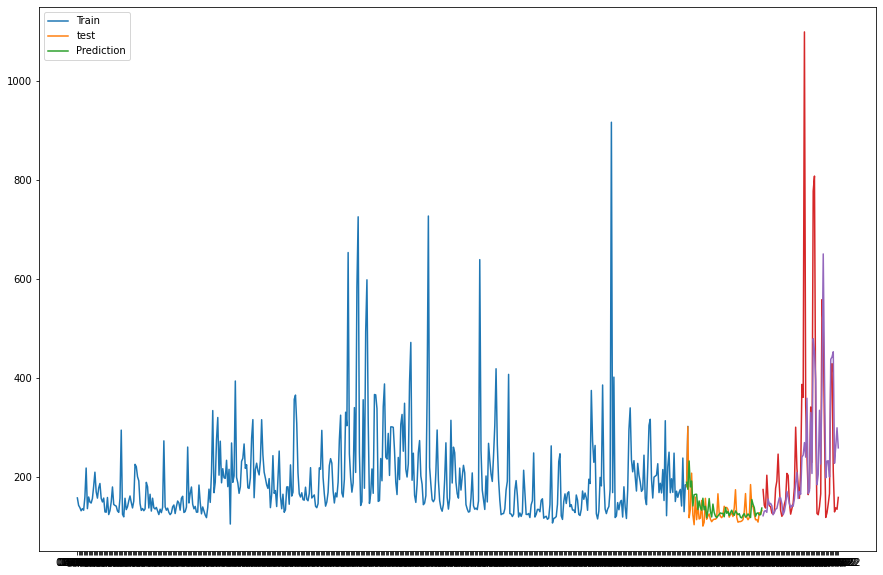

In [53]:
plt.figure(figsize=(15,10))
plt.plot(train_dates,train_labels,label="Train")
plt.plot(test_dates,test_labels,label="test")
plt.plot(test_dates,nbeats_preds,label="Prediction")
plt.plot(val_dates,val_labels)
plt.plot(val_dates,nbeats.predict(val_windows))
plt.legend()

#Metrics


In [54]:
def metric(y_true,y_pred):
  mae=tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_true,y_pred)
  mse=tf.keras.metrics.MeanSquaredError()
  mse.update_state(y_true,y_pred)
  rmse=tf.keras.metrics.RootMeanSquaredError()
  rmse.update_state(y_true,y_pred)
  mape=tf.keras.metrics.MeanAbsolutePercentageError()
  mape.update_state(y_true,y_pred)

  return {"mae":mae.result().numpy(),"mse":mse.result().numpy(),"rmse":rmse.result().numpy(),"mape":mape.result().numpy()}

In [55]:
dense_results=metric(test_labels,dense_preds)
dense_results

{'mae': 21.871532, 'mse': 1116.1274, 'rmse': 33.408493, 'mape': 15.875429}

In [56]:
conv_results=metric(test_labels,conv_preds)
conv_results

{'mae': 23.85485, 'mse': 1332.1462, 'rmse': 36.49858, 'mape': 16.72744}

In [57]:
lstm_results=metric(test_labels,lstm_preds)
lstm_results

{'mae': 20.019178, 'mse': 973.5343, 'rmse': 31.201511, 'mape': 13.819635}

In [58]:
BIlstm_results=metric(test_labels,Bi_LSTM_preds)
BIlstm_results

{'mae': 17.473726, 'mse': 895.5907, 'rmse': 29.926422, 'mape': 12.008994}

In [59]:
nbeats_results=metric(test_labels,nbeats_preds)
nbeats_results

{'mae': 19.976866, 'mse': 999.72925, 'rmse': 31.618496, 'mape': 14.896016}

In [60]:
def make_future_forecast(model, into_future, window_size=7) -> list:

  future_forecast = []
  last_window = prices[-30:] 

  for _ in range(into_future):
    
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-30:]
  
  return future_forecast

In [61]:
future_forecast = make_future_forecast(
                                       model=nbeats,
                                       into_future=60,
                                       window_size=30)

1/1 [==============================] - 0s 31ms/step


In [62]:
dates

0      01/01/21
1      02/01/21
2      03/01/21
3      04/01/21
4      05/01/21
         ...   
633    26/09/22
634    27/09/22
635    28/09/22
636    29/09/22
637    30/09/22
Name: DT, Length: 638, dtype: object

In [63]:
import datetime
s=datetime.datetime.strptime("1-10-2022","%d-%m-%Y")
s
import pandas
predictions_date=pandas.date_range(s,periods=60,freq='d')

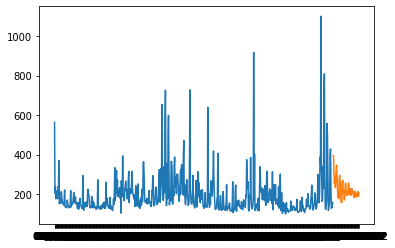

In [64]:
plt.plot(dates,prices)
plt.plot(list(predictions_date.strftime("%d-%m-%Y")),future_forecast)

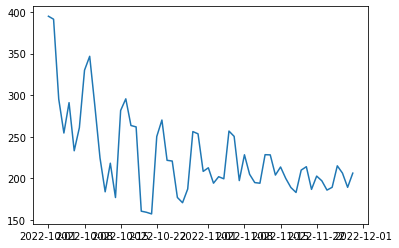

In [65]:
plt.plot(predictions_date,future_forecast)

In [66]:
pd.DataFrame(predictions_date,future_forecast).to_csv('predictions.csv')

In [67]:
from keras.utils import plot_model

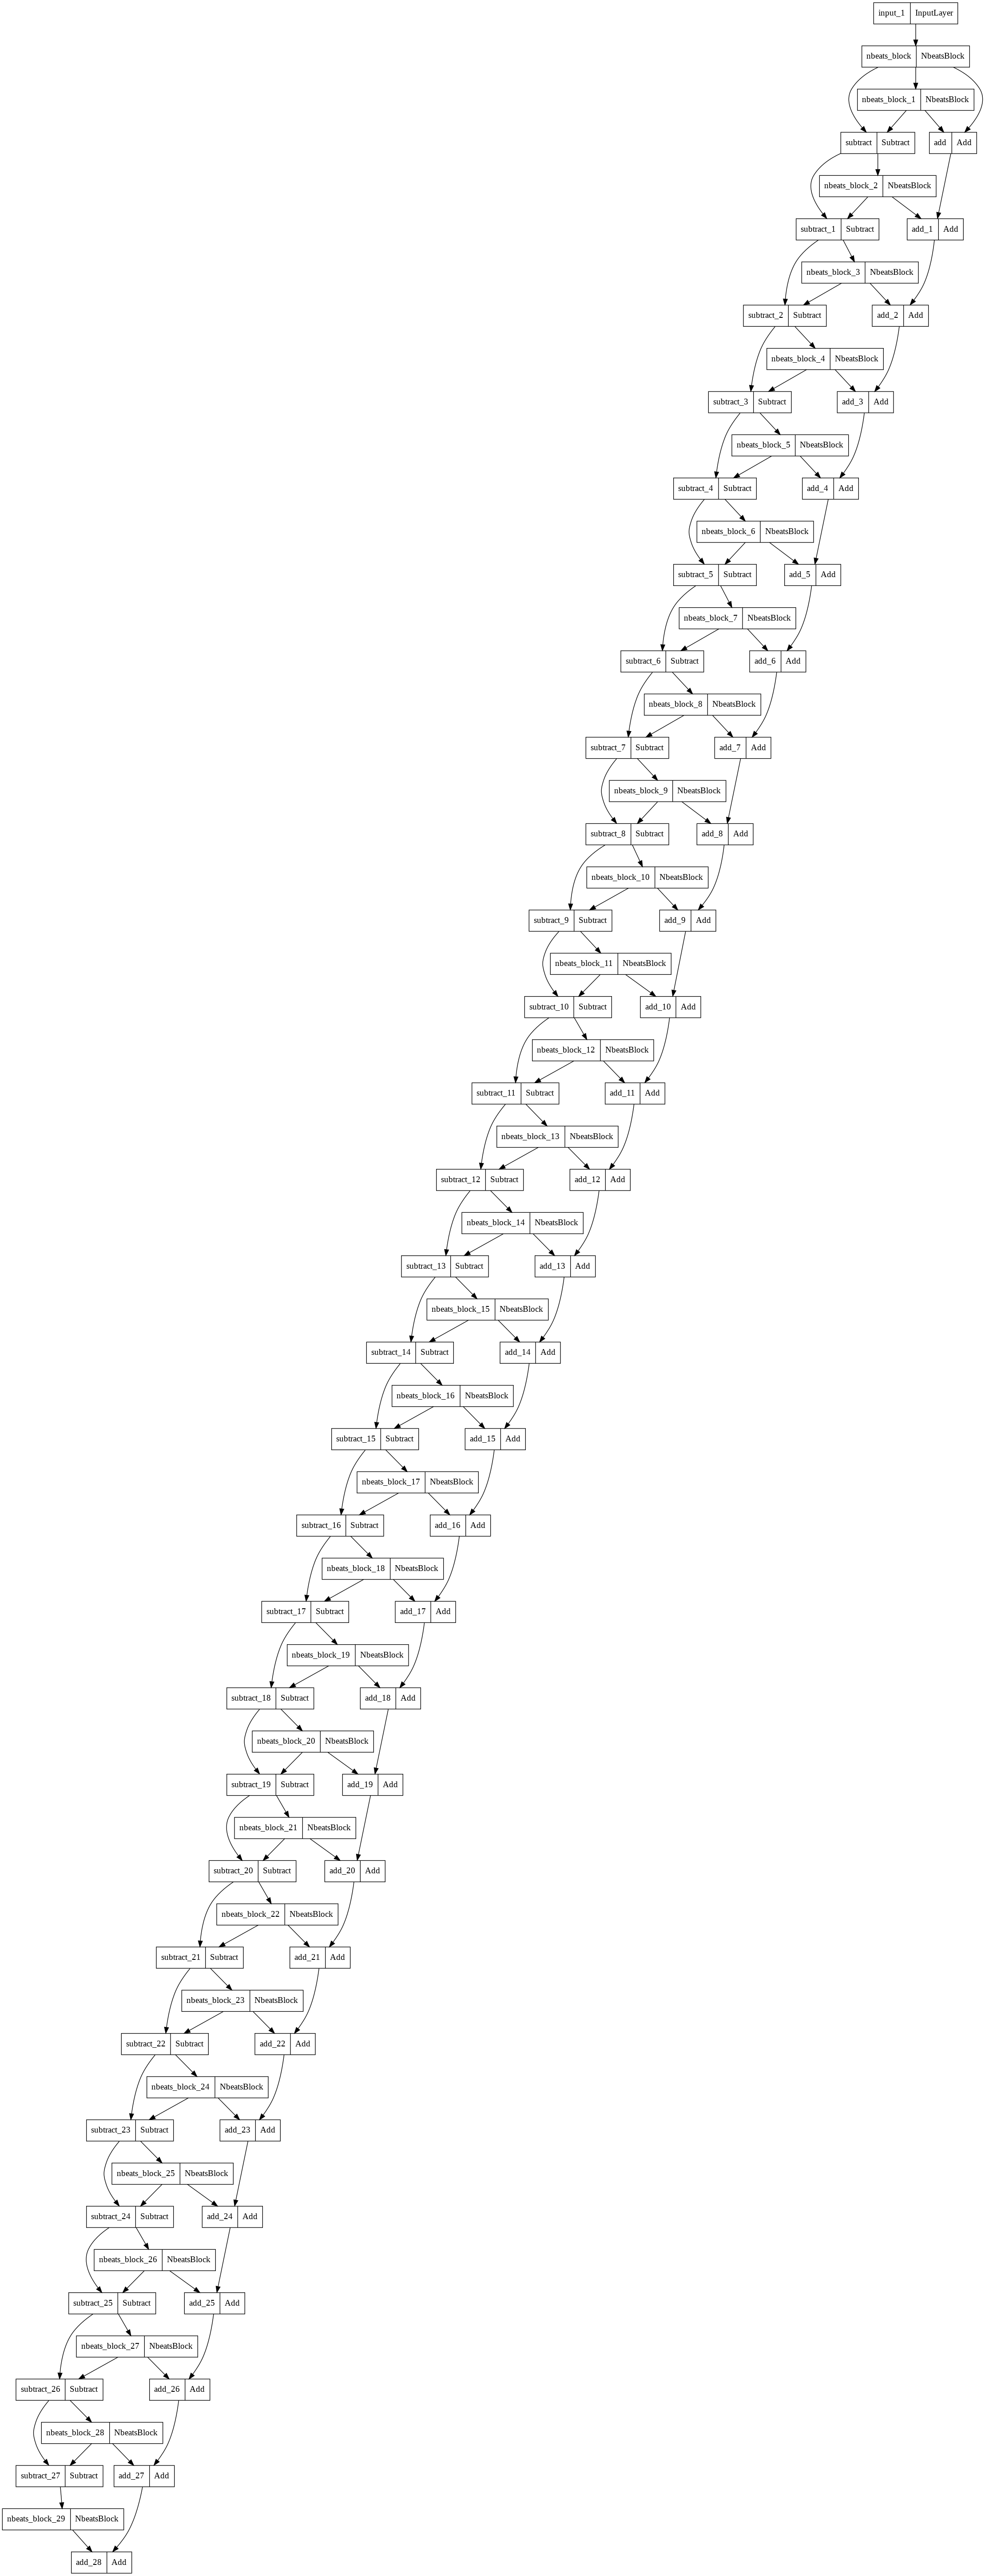

In [68]:
plot_model(nbeats)